In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [ ]:
df = pd.read_csv('/content/stock dataset.csv')

In [ ]:
dataset = df.values


In [ ]:
training_data = dataset[:500, 1:2]

In [ ]:
training_data

array([[234.05],
       [234.55],
       [240.0],
       [233.3],
       [233.55],
       [235.0],
       [235.95],
       [237.9],
       [233.15],
       [223.45],
       [216.35],
       [222.5],
       [222.5],
       [221.0],
       [224.0],
       [222.0],
       [238.2],
       [236.0],
       [237.0],
       [235.35],
       [233.85],
       [237.0],
       [231.8],
       [234.5],
       [240.3],
       [246.9],
       [244.0],
       [240.8],
       [236.05],
       [235.0],
       [233.0],
       [237.3],
       [236.65],
       [237.25],
       [241.0],
       [235.15],
       [236.0],
       [232.5],
       [248.7],
       [243.4],
       [243.7],
       [241.0],
       [235.9],
       [248.5],
       [244.0],
       [238.9],
       [231.25],
       [239.7],
       [248.4],
       [241.55],
       [257.9],
       [265.0],
       [270.4],
       [274.8],
       [275.9],
       [268.25],
       [269.8],
       [277.45],
       [281.0],
       [264.5],
       [271.0],
       

In [ ]:
testing_data = dataset[500:, 1:2]

In [ ]:
testing_data

array([[138.9],
       [139.15],
       [138.0],
       ...,
       [121.8],
       [120.3],
       [122.1]], dtype=object)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
training_data_scaled = scaler.fit_transform(training_data)


In [ ]:
X_train = []
y_train = []
for i in range(60, len(training_data)):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
X_test = []
for i in range(60, len(testing_data)):
    X_test.append(testing_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
14/14 [==============================] - 10s 93ms/step - loss: 0.0580
Epoch 2/100
14/14 [==============================] - 2s 132ms/step - loss: 0.0163
Epoch 3/100
14/14 [==============================] - 2s 118ms/step - loss: 0.0103
Epoch 4/100
14/14 [==============================] - 2s 155ms/step - loss: 0.0071
Epoch 5/100
14/14 [==============================] - 1s 92ms/step - loss: 0.0062
Epoch 6/100
14/14 [==============================] - 1s 92ms/step - loss: 0.0068
Epoch 7/100
14/14 [==============================] - 1s 91ms/step - loss: 0.0062
Epoch 8/100
14/14 [==============================] - 1s 91ms/step - loss: 0.0062
Epoch 9/100
14/14 [==============================] - 1s 92ms/step - loss: 0.0061
Epoch 10/100
14/14 [==============================] - 1s 91ms/step - loss: 0.0049
Epoch 11/100
14/14 [==============================] - 1s 92ms/step - loss: 0.0063
Epoch 12/100
14/14 [==============================] - 2s 112ms/step - loss: 0.0059
Epoch 13/100
14/14 [

In [ ]:
predicted_stock_price = model.predict(X_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


14/14 [==============================] - 3s 39ms/step


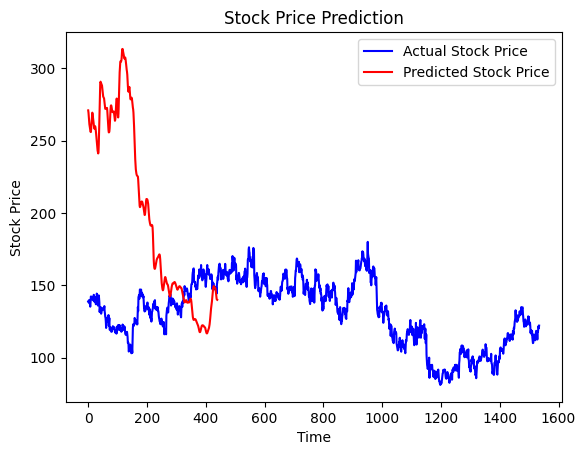

In [ ]:
import matplotlib.pyplot as plt
plt.plot(testing_data, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()